In [ ]:
# Q1. XOR gate Classification

import numpy as np

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

def initialize_weights(input_size):
    return np.zeros(input_size + 1)  # +1 is for bias

def activation(summation):
    return 1 if summation >= 0 else 0

def predict(inputs, weights):
    summation = np.dot(inputs, weights[1:]) + weights[0]  # Weights[0] is bias
    return activation(summation)

def train(X, y, weights, learning_rate=0.1, epochs=100):
    for _ in range(epochs):
        for inputs, label in zip(X, y):
            prediction = predict(inputs, weights)
            error = label - prediction
            weights[1:] += learning_rate * error * inputs
            weights[0] += learning_rate * error
    return weights

weights = initialize_weights(input_size=2)

weights = train(X, y, weights, learning_rate=0.1, epochs=100)

print("SLP Predictions for XOR gate:")
for inputs in X:
    print(f"Input: {inputs} -> Output: {predict(inputs, weights)}")


SLP Predictions for XOR gate:
Input: [0 0] -> Output: 1
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 0



Updated MLP Predictions for XOR gate:
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 0


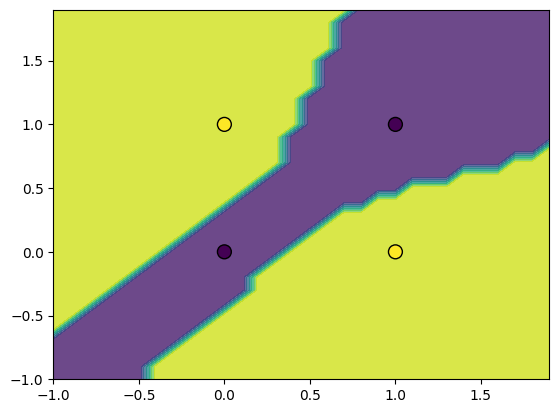

In [ ]:
# Multi-Layer Perceptron (MLP) for XOR

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

mlp = MLPClassifier(hidden_layer_sizes=(5,), activation='relu', solver='adam', max_iter=10000, learning_rate_init=0.01)

mlp.fit(X, y)

mlp_predictions = mlp.predict(X)

print("\nUpdated MLP Predictions for XOR gate:")
for inputs, prediction in zip(X, mlp_predictions):
    print(f"Input: {inputs} -> Output: {prediction}")


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

data = pd.read_csv('/content/Tweets - Tweets.csv')

data_filtered = data[data['airline_sentiment'].isin(['positive', 'negative'])]

texts = data_filtered['text'].values
labels = data_filtered['airline_sentiment'].values

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # positive = 1 & negative = 0

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(texts).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)



In [12]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * 0.01  # Input to hidden layer weights
    b1 = np.zeros((1, hidden_size))  # Hidden layer bias
    W2 = np.random.randn(hidden_size, output_size) * 0.01  # Hidden to output layer weights
    b2 = np.zeros((1, output_size))  # Output layer bias
    return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2, activation_function):
    Z1 = np.dot(X, W1) + b1
    if activation_function == 'sigmoid':
        A1 = sigmoid(Z1)
    elif activation_function == 'relu':
        A1 = relu(Z1)
    elif activation_function == 'tanh':
        A1 = tanh(Z1)

    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(X, y, W1, b1, W2, b2, Z1, A1, A2, activation_function):
    m = X.shape[0]
    dZ2 = A2 - y.reshape(-1, 1)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    if activation_function == 'sigmoid':
        dA1 = np.dot(dZ2, W2.T) * sigmoid_derivative(Z1)
    elif activation_function == 'relu':
        dA1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    elif activation_function == 'tanh':
        dA1 = np.dot(dZ2, W2.T) * tanh_derivative(Z1)

    dW1 = np.dot(X.T, dA1) / m
    db1 = np.sum(dA1, axis=0, keepdims=True) / m

    return dW1, db1, dW2, db2

def train_neural_network(X_train, y_train, hidden_size, epochs, learning_rate, activation_function):
    input_size = X_train.shape[1]
    output_size = 1  # Binary classification
    W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

    losses = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2, activation_function)

        m = y_train.shape[0]
        loss = -np.mean(y_train * np.log(A2) + (1 - y_train) * np.log(1 - A2))
        losses.append(loss)

        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, W1, b1, W2, b2, Z1, A1, A2, activation_function)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W1, b1, W2, b2, losses

def predict(X, W1, b1, W2, b2, activation_function):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2, activation_function)
    return (A2 > 0.5).astype(int)

def evaluate_model(X_train, X_test, y_train, y_test, activation_functions):
    results = {}

    for activation_function in activation_functions:
        print(f"Training with {activation_function} activation function...")
        W1, b1, W2, b2, losses = train_neural_network(X_train, y_train, hidden_size=10, epochs=1000, learning_rate=0.01, activation_function=activation_function)

        plt.plot(losses)
        plt.title(f'Loss over Epochs ({activation_function})')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

        y_pred = predict(X_test, W1, b1, W2, b2, activation_function)

        accuracy = np.mean(y_pred.flatten() == y_test) * 100
        print(f"Test Accuracy with {activation_function} activation: {accuracy:.2f}%\n")
        results[activation_function] = accuracy

    return results


In [14]:
activation_functions = ['relu', 'sigmoid', 'tanh']

results = evaluate_model(X_train, X_test, y_train, y_test, activation_functions)

for activation_function, accuracy in results.items():
    print(f"Final Test Accuracy using {activation_function} activation: {accuracy:.2f}%")

Training with relu activation function...
Epoch 0, Loss: 0.6931371497758132


KeyboardInterrupt: 